In [1]:
from pandas import *

In [5]:
df1 = DataFrame({'key':['b','b','a','c','a','a','b'],'data1':list(range(7))})
df1

data1 key
0      0   b
1      1   b
2      2   a
3      3   c
4      4   a
5      5   a
6      6   b

In [13]:
df2 = DataFrame({'key':['a','b','d'],'data2':list(range(3))})
df2

data2 key
0      0   a
1      1   b
2      2   d

In [14]:
merge(df1,df2)

data1 key  data2
0      0   b      1
1      1   b      1
2      6   b      1
3      2   a      0
4      4   a      0
5      5   a      0

In [15]:
merge(df1,df2,on='key')

data1 key  data2
0      0   b      1
1      1   b      1
2      6   b      1
3      2   a      0
4      4   a      0
5      5   a      0

In [16]:
df3 = DataFrame({'lkey':['b','b','a','c','a','a','b'],'data1':list(range(7))})
df4 = DataFrame({'rkey':['a','b','d'],'data2':list(range(3))})

In [17]:
merge(df3,df4,left_on='lkey',right_on='rkey')

data1 lkey  data2 rkey
0      0    b      1    b
1      1    b      1    b
2      6    b      1    b
3      2    a      0    a
4      4    a      0    a
5      5    a      0    a

In [18]:
merge(df1,df2,how='outer')

data1 key  data2
0    0.0   b    1.0
1    1.0   b    1.0
2    6.0   b    1.0
3    2.0   a    0.0
4    4.0   a    0.0
5    5.0   a    0.0
6    3.0   c    NaN
7    NaN   d    2.0

In [19]:
df1 = DataFrame({'key':list('bbacab'),'data':list(range(6))})
df2 = DataFrame({'key':list('ababd'),'data':list(range(5))})

In [20]:
df1

data key
0     0   b
1     1   b
2     2   a
3     3   c
4     4   a
5     5   b

In [21]:
df2

data key
0     0   a
1     1   b
2     2   a
3     3   b
4     4   d

In [22]:
merge(df1,df2,on='key',how='left') # df1 has 3"b" and df2 has 2, so in output we have 3*2=6"b"

data_x key  data_y
0        0   b     1.0
1        0   b     3.0
2        1   b     1.0
3        1   b     3.0
4        2   a     0.0
5        2   a     2.0
6        3   c     NaN
7        4   a     0.0
8        4   a     2.0
9        5   b     1.0
10       5   b     3.0

In [24]:
merge(df1,df2,on='key',how='inner')

data_x key  data_y
0       0   b       1
1       0   b       3
2       1   b       1
3       1   b       3
4       5   b       1
5       5   b       3
6       2   a       0
7       2   a       2
8       4   a       0
9       4   a       2

In [28]:
left = DataFrame({'key1':['foo','foo','bar'],
                  'key2':['one','two','one'],
                  'lval':[1,2,3]})

In [29]:
right = DataFrame({'key1':['foo','foo','bar','bar'],
                  'key2':['one','one','one','two'],
                  'rval':[4,5,6,7]})

In [30]:
merge(left,right,on=['key1','key2'],how='outer')

key1 key2  lval  rval
0  foo  one   1.0   4.0
1  foo  one   1.0   5.0
2  foo  two   2.0   NaN
3  bar  one   3.0   6.0
4  bar  two   NaN   7.0

In [31]:
merge(left,right,on='key1')

key1 key2_x  lval key2_y  rval
0  foo    one     1    one     4
1  foo    one     1    one     5
2  foo    two     2    one     4
3  foo    two     2    one     5
4  bar    one     3    one     6
5  bar    one     3    two     7

In [32]:
merge(left,right,on='key1',suffixes=('_left','_right'))

key1 key2_left  lval key2_right  rval
0  foo       one     1        one     4
1  foo       one     1        one     5
2  foo       two     2        one     4
3  foo       two     2        one     5
4  bar       one     3        one     6
5  bar       one     3        two     7

In [33]:
left1 = DataFrame({'key':list('abaabc'),'value':list(range(6))})
right1 = DataFrame({'group_val':[2.5,7]},index=['a','b'])

In [34]:
left1

key  value
0   a      0
1   b      1
2   a      2
3   a      3
4   b      4
5   c      5

In [35]:
right1

group_val
a        2.5
b        7.0

In [36]:
merge(left1,right1,left_on='key',right_index=True)

key  value  group_val
0   a      0        2.5
2   a      2        2.5
3   a      3        2.5
1   b      1        7.0
4   b      4        7.0

In [37]:
merge(left1,right1,left_on='key',right_index=True,how='outer')

key  value  group_val
0   a      0        2.5
2   a      2        2.5
3   a      3        2.5
1   b      1        7.0
4   b      4        7.0
5   c      5        NaN

In [40]:
lefth = DataFrame({'key1':['Ohio','Ohio','Ohio','Nevada','Nevada'],
                   'key2':[2000,2001,2002,2001,2002],
                  'data':list(np.arange(5))})

In [48]:
righth = DataFrame(np.arange(12).reshape((6,2)),
                   index=[['Nevada','Nevada','Ohio','Ohio','Ohio','Ohio'],
                          [2001,2000,2000,2000,2001,2002]],
                   columns=['event1','event2'])

In [43]:
lefth

data    key1  key2
0     0    Ohio  2000
1     1    Ohio  2001
2     2    Ohio  2002
3     3  Nevada  2001
4     4  Nevada  2002

In [49]:
righth

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In [50]:
merge(lefth,righth,left_on=['key1','key2'],right_index=True)

data    key1  key2  event1  event2
0     0    Ohio  2000       4       5
0     0    Ohio  2000       6       7
1     1    Ohio  2001       8       9
2     2    Ohio  2002      10      11
3     3  Nevada  2001       0       1

In [51]:
merge(lefth,righth,left_on=['key1','key2'],right_index=True,how='outer')

data    key1  key2  event1  event2
0   0.0    Ohio  2000     4.0     5.0
0   0.0    Ohio  2000     6.0     7.0
1   1.0    Ohio  2001     8.0     9.0
2   2.0    Ohio  2002    10.0    11.0
3   3.0  Nevada  2001     0.0     1.0
4   4.0  Nevada  2002     NaN     NaN
4   NaN  Nevada  2000     2.0     3.0

In [52]:
left2 = DataFrame([[1,2],[3,4],[5,6]],
                 index=['a','c','e'],
                 columns=['Ohio','Nevada'])

In [53]:
right2 = DataFrame([[7,8],[9,10],[11,12],[13,14]],
                  index=list('bcde'),columns=['Missouri','Alabama'])

In [54]:
left2

Ohio  Nevada
a     1       2
c     3       4
e     5       6

In [55]:
right2

Missouri  Alabama
b         7        8
c         9       10
d        11       12
e        13       14

In [56]:
merge(left2,right2,how='outer',left_index=True,right_index=True)

Ohio  Nevada  Missouri  Alabama
a   1.0     2.0       NaN      NaN
b   NaN     NaN       7.0      8.0
c   3.0     4.0       9.0     10.0
d   NaN     NaN      11.0     12.0
e   5.0     6.0      13.0     14.0

In [57]:
left2.join(right2,how='outer')

Ohio  Nevada  Missouri  Alabama
a   1.0     2.0       NaN      NaN
b   NaN     NaN       7.0      8.0
c   3.0     4.0       9.0     10.0
d   NaN     NaN      11.0     12.0
e   5.0     6.0      13.0     14.0

In [58]:
left1.join(right1,on='key')

key  value  group_val
0   a      0        2.5
1   b      1        7.0
2   a      2        2.5
3   a      3        2.5
4   b      4        7.0
5   c      5        NaN

In [59]:
another = DataFrame([[7,8],[9,10],[11,12],[16,17]],
                   index=list('acef'),columns=['New York','Oregon'])

In [60]:
left2.join([right2,another])

Ohio  Nevada  Missouri  Alabama  New York  Oregon
a     1       2       NaN      NaN         7       8
c     3       4       9.0     10.0         9      10
e     5       6      13.0     14.0        11      12

In [61]:
left2.join([right2,another],how='outer')

Ohio  Nevada  Missouri  Alabama  New York  Oregon
a   1.0     2.0       NaN      NaN       7.0     8.0
b   NaN     NaN       7.0      8.0       NaN     NaN
c   3.0     4.0       9.0     10.0       9.0    10.0
d   NaN     NaN      11.0     12.0       NaN     NaN
e   5.0     6.0      13.0     14.0      11.0    12.0
f   NaN     NaN       NaN      NaN      16.0    17.0

In [62]:
s1 = Series([0,1],index=['a','b'])
s2 =Series([2,3,4],index=['c','d','e'])
s3=Series([5,6],index=['f','g'])

In [64]:
concat([s1,s2,s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [65]:
concat([s1,s2,s3],axis=1)

0    1    2
a  0.0  NaN  NaN
b  1.0  NaN  NaN
c  NaN  2.0  NaN
d  NaN  3.0  NaN
e  NaN  4.0  NaN
f  NaN  NaN  5.0
g  NaN  NaN  6.0

In [66]:
s4 = concat([s1*5,s3])

In [67]:
concat([s1,s4],axis=1)

0  1
a  0.0  0
b  1.0  5
f  NaN  5
g  NaN  6

In [69]:
concat([s1,s4],axis=1,join='inner')

0  1
a  0  0
b  1  5

In [70]:
concat([s1,s4],axis=1,join_axes=[['a','c','b','d']])

0    1
a  0.0  0.0
c  NaN  NaN
b  1.0  5.0
d  NaN  NaN

In [72]:
result = concat([s1,s2,s3],keys=['one','two','three'])
result

one    a    0
       b    1
two    c    2
       d    3
       e    4
three  f    5
       g    6
dtype: int64

In [73]:
result.unstack()

a    b    c    d    e    f    g
one    0.0  1.0  NaN  NaN  NaN  NaN  NaN
two    NaN  NaN  2.0  3.0  4.0  NaN  NaN
three  NaN  NaN  NaN  NaN  NaN  5.0  6.0

In [74]:
concat([s1,s2,s3],axis=1,keys=['one','two','three'])

one  two  three
a  0.0  NaN    NaN
b  1.0  NaN    NaN
c  NaN  2.0    NaN
d  NaN  3.0    NaN
e  NaN  4.0    NaN
f  NaN  NaN    5.0
g  NaN  NaN    6.0

In [75]:
df1 = DataFrame(np.arange(6).reshape((3,2)),index=list('abc'),columns=['one','two'])
df2 = DataFrame(5+np.arange(4).reshape((2,2)),index=['a','c'],columns=['three','four'])

In [77]:
concat([df1,df2],axis=1,keys=['level1','level2'])

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [78]:
concat({'level1':df1,'level2':df2},axis=1)

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [79]:
concat([df1,df2],axis=1,keys=['level1','level2'],
      names=['upper','lower'])

upper level1     level2     
lower    one two  three four
a          0   1    5.0  6.0
b          2   3    NaN  NaN
c          4   5    7.0  8.0

In [80]:
a = Series([np.nan,2.5,np.nan,3.5,4.5,np.nan],index=list('fedcba'))
b = Series(np.arange(len(a),dtype=np.float64),index=list('fedcba'))

In [81]:
b

f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    5.0
dtype: float64

In [82]:
b[-1] = np.nan

In [83]:
b

f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    NaN
dtype: float64

In [84]:
a

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

In [85]:
np.where(isnull(a),b,a) # equales to : for each row, if value in a isnull, take correspondant value from b, else b
# same as: b if isnull(a) else a

array([ 0. ,  2.5,  2. ,  3.5,  4.5,  nan])

In [86]:
b[:-2].combine_first(a[2:]) 
#equales to: for each row, if value exists only in b or a, take it, if value exists both in b and a ,take b's

a    NaN
b    4.5
c    3.0
d    2.0
e    1.0
f    0.0
dtype: float64

In [90]:
df1 = DataFrame({'a':[1,np.nan,5,np.nan],
                'b':[np.nan,2,np.nan,6],
                'c':list(range(2,18,4))})

In [91]:
df2 = DataFrame({'a':[5,4,np.nan,3,7],
                'b':[np.nan,3,4,6,8]})

In [92]:
df1.combine_first(df2) # same as Series. Actually we can say that this function is using df2 to fill missing values in df1

a    b     c
0  1.0  NaN   2.0
1  4.0  2.0   6.0
2  5.0  4.0  10.0
3  3.0  6.0  14.0
4  7.0  8.0   NaN

## Reshape and Pivot

In [93]:
data = DataFrame(np.arange(6).reshape((2,3)),
                index = Index(['Ohio','Colorado'],name='State'),
                columns=Index(['one','two','three'],name='member'))

In [94]:
data

member    one  two  three
State                    
Ohio        0    1      2
Colorado    3    4      5

In [96]:
result=data.stack()

In [97]:
result

State     member
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32

In [98]:
type(result) # DataFrame turned into Series

pandas.core.series.Series

In [99]:
result.unstack()

member    one  two  three
State                    
Ohio        0    1      2
Colorado    3    4      5

In [100]:
result.unstack(0)

State   Ohio  Colorado
member                
one        0         3
two        1         4
three      2         5

In [101]:
result.unstack('State')

State   Ohio  Colorado
member                
one        0         3
two        1         4
three      2         5

In [102]:
s1 = Series([0,1,2,3],index=list('abcd'))
s2 = Series([4,5,6],index=list('cde'))
data2 = concat([s1,s2],keys=['one','two'])
data2

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: int64

In [103]:
data2.unstack()

a    b    c    d    e
one  0.0  1.0  2.0  3.0  NaN
two  NaN  NaN  4.0  5.0  6.0

In [104]:
data2.unstack().stack()
# stack will remove automatically nan values, so this operation is reversable.

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
two  c    4.0
     d    5.0
     e    6.0
dtype: float64

In [105]:
data2.unstack().stack(dropna=False)

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
     e    NaN
two  a    NaN
     b    NaN
     c    4.0
     d    5.0
     e    6.0
dtype: float64

In [107]:
df = DataFrame({'left': result, 'right': result + 5},
               columns=Index(['left', 'right'], name='side'))
df

side             left  right
State    member             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [109]:
df.unstack('State')

side   left          right         
State  Ohio Colorado  Ohio Colorado
member                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

In [110]:
df.unstack('State').stack('side')

State         Colorado  Ohio
member side                 
one    left          3     0
       right         8     5
two    left          4     1
       right         9     6
three  left          5     2
       right        10     7

## Pivoting "Long" to "Wide" format

In [111]:
data = read_csv(r'C:\Users\Zishi\Documents\GitHub\pydata-book\ch07\macrodata.csv')
data.head()

year  quarter   realgdp  realcons  realinv  realgovt  realdpi    cpi  \
0  1959.0      1.0  2710.349    1707.4  286.898   470.045   1886.9  28.98   
1  1959.0      2.0  2778.801    1733.7  310.859   481.301   1919.7  29.15   
2  1959.0      3.0  2775.488    1751.8  289.226   491.260   1916.4  29.35   
3  1959.0      4.0  2785.204    1753.7  299.356   484.052   1931.3  29.37   
4  1960.0      1.0  2847.699    1770.5  331.722   462.199   1955.5  29.54   

      m1  tbilrate  unemp      pop  infl  realint  
0  139.7      2.82    5.8  177.146  0.00     0.00  
1  141.7      3.08    5.1  177.830  2.34     0.74  
2  140.5      3.82    5.3  178.657  2.74     1.09  
3  140.0      4.33    5.6  179.386  0.27     4.06  
4  139.6      3.50    5.2  180.007  2.31     1.19

In [114]:
periods = PeriodIndex(year=data.year,quarter=data.quarter,name='date')

In [115]:
data = DataFrame(data.to_records(),
                 columns=Index(['realgdp', 'infl', 'unemp'], name='item'),
                 index=periods.to_timestamp('D', 'end'))
data.head()

item         realgdp  infl  unemp
date                             
1959-03-31  2710.349  0.00    5.8
1959-06-30  2778.801  2.34    5.1
1959-09-30  2775.488  2.74    5.3
1959-12-31  2785.204  0.27    5.6
1960-03-31  2847.699  2.31    5.2

In [122]:
ldata = data.unstack().reset_index().rename(columns={0: 'value'})

In [123]:
wdata = ldata.pivot('date', 'item', 'value')

In [124]:
ldata[:10]

item       date     value
0  realgdp 1959-03-31  2710.349
1  realgdp 1959-06-30  2778.801
2  realgdp 1959-09-30  2775.488
3  realgdp 1959-12-31  2785.204
4  realgdp 1960-03-31  2847.699
5  realgdp 1960-06-30  2834.390
6  realgdp 1960-09-30  2839.022
7  realgdp 1960-12-31  2802.616
8  realgdp 1961-03-31  2819.264
9  realgdp 1961-06-30  2872.005

In [125]:
temp = DataFrame(ldata.pop('date'))
ldata = temp.join(ldata)

In [129]:
pivoted = ldata.pivot('date','item','value')
pivoted.head()

item        infl   realgdp  unemp
date                             
1959-03-31  0.00  2710.349    5.8
1959-06-30  2.34  2778.801    5.1
1959-09-30  2.74  2775.488    5.3
1959-12-31  0.27  2785.204    5.6
1960-03-31  2.31  2847.699    5.2

In [130]:
import numpy as np
ldata['value2'] = np.random.randn(len(ldata))
ldata[:10]

date     item     value    value2
0 1959-03-31  realgdp  2710.349 -1.176140
1 1959-06-30  realgdp  2778.801 -0.050291
2 1959-09-30  realgdp  2775.488 -0.884406
3 1959-12-31  realgdp  2785.204  0.157498
4 1960-03-31  realgdp  2847.699 -1.881377
5 1960-06-30  realgdp  2834.390 -0.887964
6 1960-09-30  realgdp  2839.022  0.745292
7 1960-12-31  realgdp  2802.616 -0.934625
8 1961-03-31  realgdp  2819.264 -0.421531
9 1961-06-30  realgdp  2872.005  0.051940

In [133]:
pivoted = ldata.pivot('date','item')
pivoted.head()

value                    value2                    
item        infl   realgdp unemp      infl   realgdp     unemp
date                                                          
1959-03-31  0.00  2710.349   5.8  2.212900 -1.176140  0.177156
1959-06-30  2.34  2778.801   5.1 -1.355801 -0.050291  0.685023
1959-09-30  2.74  2775.488   5.3 -1.939324 -0.884406 -0.915618
1959-12-31  0.27  2785.204   5.6  1.155147  0.157498 -0.489322
1960-03-31  2.31  2847.699   5.2  1.010875 -1.881377 -1.590590

In [134]:
pivoted['value'][:5]

item        infl   realgdp  unemp
date                             
1959-03-31  0.00  2710.349    5.8
1959-06-30  2.34  2778.801    5.1
1959-09-30  2.74  2775.488    5.3
1959-12-31  0.27  2785.204    5.6
1960-03-31  2.31  2847.699    5.2

In [135]:
unstacked = ldata.set_index(['date','item']).unstack('item')
unstacked.head()

value                    value2                    
item        infl   realgdp unemp      infl   realgdp     unemp
date                                                          
1959-03-31  0.00  2710.349   5.8  2.212900 -1.176140  0.177156
1959-06-30  2.34  2778.801   5.1 -1.355801 -0.050291  0.685023
1959-09-30  2.74  2775.488   5.3 -1.939324 -0.884406 -0.915618
1959-12-31  0.27  2785.204   5.6  1.155147  0.157498 -0.489322
1960-03-31  2.31  2847.699   5.2  1.010875 -1.881377 -1.590590

# Data Transformation

## Removing duplicates

In [137]:
data = DataFrame({'k1':['ones']*3+['twos']*4,
                 'k2':[1,1,2,3,3,4,4]})
data

k1  k2
0  ones   1
1  ones   1
2  ones   2
3  twos   3
4  twos   3
5  twos   4
6  twos   4

In [138]:
data.duplicated()

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [139]:
data.drop_duplicates()

k1  k2
0  ones   1
2  ones   2
3  twos   3
5  twos   4

In [141]:
data['v1']=list(range(7))
data.drop_duplicates(['k1'])

k1  k2  v1
0  ones   1   0
3  twos   3   3

In [144]:
data.drop_duplicates(['k1','k2'],keep='last')

k1  k2  v1
1  ones   1   1
2  ones   2   2
4  twos   3   4
6  twos   4   6

## Transforming data using a function or mapping

In [145]:
data = DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'Pastrami',
                           'corned beef', 'Bacon', 'pastrami', 'honey ham',
                           'nova lox'],
                  'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

food  ounces
0        bacon     4.0
1  pulled pork     3.0
2        bacon    12.0
3     Pastrami     6.0
4  corned beef     7.5
5        Bacon     8.0
6     pastrami     3.0
7    honey ham     5.0
8     nova lox     6.0

In [146]:
meat_to_animal = {
  'bacon': 'pig',
  'pulled pork': 'pig',
  'pastrami': 'cow',
  'corned beef': 'cow',
  'honey ham': 'pig',
  'nova lox': 'salmon'
}

In [147]:
data['animal'] = data['food'].map(str.lower).map(meat_to_animal)
data

food  ounces  animal
0        bacon     4.0     pig
1  pulled pork     3.0     pig
2        bacon    12.0     pig
3     Pastrami     6.0     cow
4  corned beef     7.5     cow
5        Bacon     8.0     pig
6     pastrami     3.0     cow
7    honey ham     5.0     pig
8     nova lox     6.0  salmon

In [150]:
data['food'].map(lambda x:meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

## Replacing values

In [151]:
data = Series([1,-999,2,-999,-1000,3])
data

0       1
1    -999
2       2
3    -999
4   -1000
5       3
dtype: int64

In [152]:
data.replace(-999,np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [154]:
data.replace([-999,-1000],np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [155]:
data.replace([-999,-1000],[np.nan,0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [156]:
data.replace({-999:np.nan,-1000:0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

## Renaming axis indexes

In [157]:
data = DataFrame(np.arange(12).reshape((3, 4)),
                 index=['Ohio', 'Colorado', 'New York'],
                 columns=['one', 'two', 'three', 'four'])

In [158]:
data

one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
New York    8    9     10    11

In [159]:
data.index.map(str.upper)

Index(['OHIO', 'COLORADO', 'NEW YORK'], dtype='object')

In [160]:
data.index = data.index.map(str.upper)

In [161]:
data

one  two  three  four
OHIO        0    1      2     3
COLORADO    4    5      6     7
NEW YORK    8    9     10    11

In [162]:
data.rename(index=str.title,columns=str.upper)

ONE  TWO  THREE  FOUR
Ohio        0    1      2     3
Colorado    4    5      6     7
New York    8    9     10    11

In [163]:
data.rename(index={'OHIO':'INDIANA'},
           columns={'three':'peekaboo'})

one  two  peekaboo  four
INDIANA     0    1         2     3
COLORADO    4    5         6     7
NEW YORK    8    9        10    11

In [164]:
data.rename(index={'OHIO':'INDIANA'},inplace=True)

In [165]:
data

one  two  three  four
INDIANA     0    1      2     3
COLORADO    4    5      6     7
NEW YORK    8    9     10    11

## Discretization and binning

In [167]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
bins = [18,25,35,60,100]
cats = cut(ages,bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [169]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [172]:
cats.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]]
              closed='right',
              dtype='interval[int64]')

In [173]:
value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [174]:
cut(ages,[18,26,36,61,100],right=False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

In [175]:
group_names = ['Youth','YoundAdult','MiddleAged','Senior']
cut(ages,bins,labels=group_names)

[Youth, Youth, Youth, YoundAdult, Youth, ..., YoundAdult, Senior, MiddleAged, MiddleAged, YoundAdult]
Length: 12
Categories (4, object): [Youth < YoundAdult < MiddleAged < Senior]

In [177]:
data = np.random.rand(20)
cut(data,4,precision=2)

[(0.51, 0.73], (0.061, 0.28], (0.73, 0.95], (0.28, 0.51], (0.73, 0.95], ..., (0.061, 0.28], (0.28, 0.51], (0.061, 0.28], (0.061, 0.28], (0.73, 0.95]]
Length: 20
Categories (4, interval[float64]): [(0.061, 0.28] < (0.28, 0.51] < (0.51, 0.73] < (0.73, 0.95]]

In [178]:
data = np.random.randn(1000)
cats=qcut(data,4)
cats

[(-0.674, 0.0257], (0.673, 3.181], (0.0257, 0.673], (-3.109, -0.674], (-0.674, 0.0257], ..., (0.0257, 0.673], (-3.109, -0.674], (-0.674, 0.0257], (0.0257, 0.673], (0.0257, 0.673]]
Length: 1000
Categories (4, interval[float64]): [(-3.109, -0.674] < (-0.674, 0.0257] < (0.0257, 0.673] < (0.673, 3.181]]

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [180]:
value_counts(cats)

(0.673, 3.181]      250
(0.0257, 0.673]     250
(-0.674, 0.0257]    250
(-3.109, -0.674]    250
dtype: int64

In [181]:
qcut(data,[0,0.1,0.5,0.9,1])

[(-1.203, 0.0257], (1.273, 3.181], (0.0257, 1.273], (-3.109, -1.203], (-1.203, 0.0257], ..., (0.0257, 1.273], (-1.203, 0.0257], (-1.203, 0.0257], (0.0257, 1.273], (0.0257, 1.273]]
Length: 1000
Categories (4, interval[float64]): [(-3.109, -1.203] < (-1.203, 0.0257] < (0.0257, 1.273] < (1.273, 3.181]]

## Detecting and filtering outliers

In [182]:
np.random.seed(12345)
data = DataFrame(np.random.randn(1000,4))
data.describe()

0            1            2            3
count  1000.000000  1000.000000  1000.000000  1000.000000
mean     -0.067684     0.067924     0.025598    -0.002298
std       0.998035     0.992106     1.006835     0.996794
min      -3.428254    -3.548824    -3.184377    -3.745356
25%      -0.774890    -0.591841    -0.641675    -0.644144
50%      -0.116401     0.101143     0.002073    -0.013611
75%       0.616366     0.780282     0.680391     0.654328
max       3.366626     2.653656     3.260383     3.927528

In [183]:
col=data[3]

In [184]:
col[np.abs(col)>3]

97     3.927528
305   -3.399312
400   -3.745356
Name: 3, dtype: float64

In [185]:
data[(np.abs(data)>3).any(1)]

0         1         2         3
5   -0.539741  0.476985  3.248944 -1.021228
97  -0.774363  0.552936  0.106061  3.927528
102 -0.655054 -0.565230  3.176873  0.959533
305 -2.315555  0.457246 -0.025907 -3.399312
324  0.050188  1.951312  3.260383  0.963301
400  0.146326  0.508391 -0.196713 -3.745356
499 -0.293333 -0.242459 -3.056990  1.918403
523 -3.428254 -0.296336 -0.439938 -0.867165
586  0.275144  1.179227 -3.184377  1.369891
808 -0.362528 -3.548824  1.553205 -2.186301
900  3.366626 -2.372214  0.851010  1.332846

In [186]:
data[np.abs(data)>3] = np.sign(data)*3
# np.sign() returns 1 or -1 according to a positive/negative number. So basically it means here: make all numbers having
# an absolute value greater than 3 equale to 3 or -3

In [187]:
data.describe()

0            1            2            3
count  1000.000000  1000.000000  1000.000000  1000.000000
mean     -0.067623     0.068473     0.025153    -0.002081
std       0.995485     0.990253     1.003977     0.989736
min      -3.000000    -3.000000    -3.000000    -3.000000
25%      -0.774890    -0.591841    -0.641675    -0.644144
50%      -0.116401     0.101143     0.002073    -0.013611
75%       0.616366     0.780282     0.680391     0.654328
max       3.000000     2.653656     3.000000     3.000000

## Permutation and random sampling

In [188]:
df = DataFrame(np.arange(5*4).reshape((5,4)))
sampler = np.random.permutation(5)
sampler

array([1, 0, 2, 3, 4])

In [189]:
df

0   1   2   3
0   0   1   2   3
1   4   5   6   7
2   8   9  10  11
3  12  13  14  15
4  16  17  18  19

In [190]:
df.take(sampler)

0   1   2   3
1   4   5   6   7
0   0   1   2   3
2   8   9  10  11
3  12  13  14  15
4  16  17  18  19

In [191]:
df.take(np.random.permutation(len(df))[:3])

0   1   2   3
1   4   5   6   7
3  12  13  14  15
4  16  17  18  19

In [192]:
bag = np.array([5,7,-1,6,4])
sampler = np.random.randint(0,len(bag),size=10)
sampler
# take() returns elements from Series of DataFrame according to their index given in sampler

array([4, 4, 2, 2, 2, 0, 3, 0, 4, 1])

In [193]:
draws = bag.take(sampler)
draws

array([ 4,  4, -1, -1, -1,  5,  6,  5,  4,  7])

## Computing indicator / dummy variables

In [195]:
df = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                'data1': range(6)})
get_dummies(df['key'])

a  b  c
0  0  1  0
1  0  1  0
2  1  0  0
3  0  0  1
4  1  0  0
5  0  1  0

In [196]:
dummies = get_dummies(df['key'],prefix='key')

In [197]:
df_with_dummy = df[['data1']].join(dummies)

In [198]:
df_with_dummy

data1  key_a  key_b  key_c
0      0      0      1      0
1      1      0      1      0
2      2      1      0      0
3      3      0      0      1
4      4      1      0      0
5      5      0      1      0

In [199]:
mnames = ['movie_id','title','genres']
movies = read_table(r'C:\Users\Zishi\Documents\GitHub\pydata-book\ch02\movielens\movies.dat',sep='::',header=None,
                   names=mnames)
movies[:10]

C:\Users\Zishi\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()


movie_id                               title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy
5         6                         Heat (1995)         Action|Crime|Thriller
6         7                      Sabrina (1995)                Comedy|Romance
7         8                 Tom and Huck (1995)          Adventure|Children's
8         9                 Sudden Death (1995)                        Action
9        10                    GoldenEye (1995)     Action|Adventure|Thriller

In [206]:
genre_iter = (set(x.split('|')) for x in movies.genres)
genres = sorted(set.union(*genre_iter))

In [207]:
dummies = DataFrame(np.zeros((len(movies),len(genres))),columns=genres)

In [211]:
for i,gen in enumerate(movies.genres):
    dummies.ix[i,gen.split('|')] = 1

In [212]:
dummies.head()

Action  Adventure  Animation  Children's  Comedy  Crime  Documentary  \
0     0.0        0.0        1.0         1.0     1.0    0.0          0.0   
1     0.0        1.0        0.0         1.0     0.0    0.0          0.0   
2     0.0        0.0        0.0         0.0     1.0    0.0          0.0   
3     0.0        0.0        0.0         0.0     1.0    0.0          0.0   
4     0.0        0.0        0.0         0.0     1.0    0.0          0.0   

   Drama  Fantasy  Film-Noir  Horror  Musical  Mystery  Romance  Sci-Fi  \
0    0.0      0.0        0.0     0.0      0.0      0.0      0.0     0.0   
1    0.0      1.0        0.0     0.0      0.0      0.0      0.0     0.0   
2    0.0      0.0        0.0     0.0      0.0      0.0      1.0     0.0   
3    1.0      0.0        0.0     0.0      0.0      0.0      0.0     0.0   
4    0.0      0.0        0.0     0.0      0.0      0.0      0.0     0.0   

   Thriller  War  Western  
0       0.0  0.0      0.0  
1       0.0  0.0      0.0  
2       0.0  0.0      0.0  
3       0.0  0.0      0.0  
4       0.0  0.0      0.0

In [214]:
movies_windic = movies.join(dummies.add_prefix('Genre_'))
movies_windic.iloc[0]

movie_id                                       1
title                           Toy Story (1995)
genres               Animation|Children's|Comedy
Genre_Action                                   0
Genre_Adventure                                0
Genre_Animation                                1
Genre_Children's                               1
Genre_Comedy                                   1
Genre_Crime                                    0
Genre_Documentary                              0
Genre_Drama                                    0
Genre_Fantasy                                  0
Genre_Film-Noir                                0
Genre_Horror                                   0
Genre_Musical                                  0
Genre_Mystery                                  0
Genre_Romance                                  0
Genre_Sci-Fi                                   0
Genre_Thriller                                 0
Genre_War                                      0
Genre_Western       

In [215]:
values = np.random.rand(10)
values

array([ 0.75603383,  0.90830844,  0.96588737,  0.17373658,  0.87592824,
        0.75415641,  0.163486  ,  0.23784062,  0.85564381,  0.58743194])

In [217]:
bins = [0,0.2,0.4,0.6,0.8,1]
get_dummies(cut(values,bins))

(0.0, 0.2]  (0.2, 0.4]  (0.4, 0.6]  (0.6, 0.8]  (0.8, 1.0]
0           0           0           0           1           0
1           0           0           0           0           1
2           0           0           0           0           1
3           1           0           0           0           0
4           0           0           0           0           1
5           0           0           0           1           0
6           1           0           0           0           0
7           0           1           0           0           0
8           0           0           0           0           1
9           0           0           1           0           0

## String

In [218]:
import json
db = json.load(open(r'C:\Users\Zishi\Documents\GitHub\pydata-book\ch07\foods-2011-10-03.json'))
len(db)

6636

In [219]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [220]:
db[0]['nutrients'][0]

{'description': 'Protein',
 'group': 'Composition',
 'units': 'g',
 'value': 25.18}

In [224]:
nutrients = DataFrame(db[0]['nutrients'])

In [225]:
nutrients[:7]

description        group units    value
0                      Protein  Composition     g    25.18
1            Total lipid (fat)  Composition     g    29.20
2  Carbohydrate, by difference  Composition     g     3.06
3                          Ash        Other     g     3.28
4                       Energy       Energy  kcal   376.00
5                        Water  Composition     g    39.28
6                       Energy       Energy    kJ  1573.00

In [227]:
info_keys=['description','group','id','manufacturer']
info = DataFrame(db,columns=info_keys)
info[:5]

description                   group    id  \
0                     Cheese, caraway  Dairy and Egg Products  1008   
1                     Cheese, cheddar  Dairy and Egg Products  1009   
2                        Cheese, edam  Dairy and Egg Products  1018   
3                        Cheese, feta  Dairy and Egg Products  1019   
4  Cheese, mozzarella, part skim milk  Dairy and Egg Products  1028   

  manufacturer  
0               
1               
2               
3               
4

In [228]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
description     6636 non-null object
group           6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [230]:
value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Pork Products                        328
Fruits and Fruit Juices              328
Name: group, dtype: int64

In [231]:
nutrients = []
for rec in db:
    fnuts = DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)
nutrients = concat(nutrients,ignore_index=True)

In [232]:
nutrients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389355 entries, 0 to 389354
Data columns (total 5 columns):
description    389355 non-null object
group          389355 non-null object
units          389355 non-null object
value          389355 non-null float64
id             389355 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 14.9+ MB


In [233]:
nutrients.head()

description        group units   value    id
0                      Protein  Composition     g   25.18  1008
1            Total lipid (fat)  Composition     g   29.20  1008
2  Carbohydrate, by difference  Composition     g    3.06  1008
3                          Ash        Other     g    3.28  1008
4                       Energy       Energy  kcal  376.00  1008

In [234]:
nutrients.duplicated().sum()

14179

In [235]:
nutrients = nutrients.drop_duplicates()

In [255]:
col_mapping1 ={'description':'food',
              'group':'fgroup'}

In [256]:
info = info.rename(columns=col_mapping1,copy=False)

In [257]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
food            6636 non-null object
fgroup          6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [260]:
col_mapping2 ={'food':'nutrient',
              'group':'nutgroup'}

In [261]:
nutrients = nutrients.rename(columns=col_mapping2,copy=False)
nutrients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 389354
Data columns (total 5 columns):
nutrient    375176 non-null object
nutgroup    375176 non-null object
units       375176 non-null object
value       375176 non-null float64
id          375176 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 17.2+ MB


In [262]:
ndata = merge(nutrients,info,on='id',how='outer')
ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
nutrient        375176 non-null object
nutgroup        375176 non-null object
units           375176 non-null object
value           375176 non-null float64
id              375176 non-null int64
food            375176 non-null object
fgroup          375176 non-null object
manufacturer    293054 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


In [263]:
ndata.iloc[30000]

nutrient                                       Glycine
nutgroup                                   Amino Acids
units                                                g
value                                             0.04
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

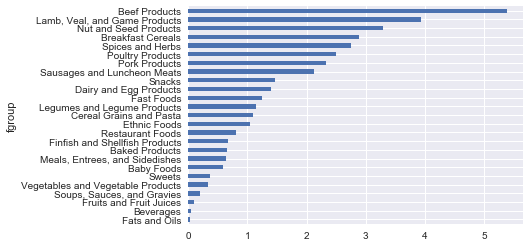

In [269]:
result = ndata.groupby(['nutrient','fgroup'])['value'].quantile(0.5)
result['Zinc, Zn'].sort_values().plot(kind='barh')

In [270]:
by_nutrient = ndata.groupby(['nutgroup','nutrient'])
get_maximum = lambda x:x.xs(x.value.idxmax())
get_minimum = lambda x:x.xs(x.value.idxmin())
max_foods = by_nutrient.apply(get_maximum)[['value','food']]

In [271]:
max_foods.food = max_foods.food.str[:50]

In [278]:
#max_foods.ix['Amino Acids']['food']
max_foods.loc['Amino Acids']['food']

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 